In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [5]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

In [6]:
df_corr_grade = df.corr()['grade'].map(abs).sort_values(ascending=False)
df_corr_grade

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.665838
floors           0.458794
yr_built         0.447865
bedrooms         0.356563
view             0.249727
long             0.200341
zipcode          0.185771
condition        0.146896
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.082818
yr_renovated     0.016669
id               0.008188
Name: grade, dtype: float64

In [7]:
df.grade.mean()

7.657915451220076

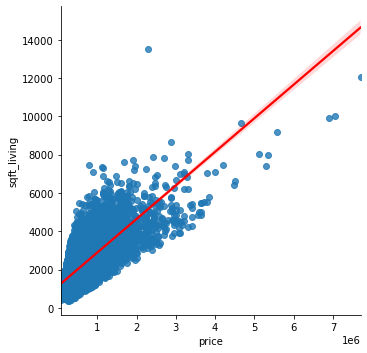

In [8]:
sns.lmplot(x='price', y='sqft_living', data=df, line_kws={'color': 'red'})
plt.show();

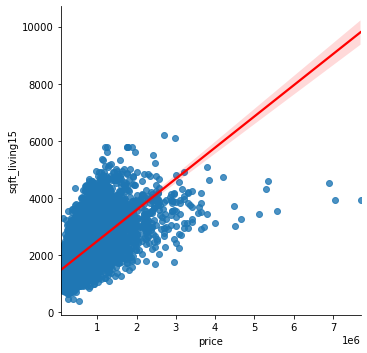

In [9]:
sns.lmplot(x='price', y='sqft_living15', data=df, line_kws={'color': 'red'})
plt.show();

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(['date', 'id', 'sqft_basement', 'waterfront', 'view', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2304.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:10:50   Log-Likelihood:            -2.4320e+05
No. Observations:               17755   AIC:                         4.864e+05
Df Residuals:                   17739   BIC:                         4.866e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.884e+06   3.44e+06     -2.294      0.022   -1.46e+07   -1.15e+06
bedrooms      -4.667e+04   2206.179    -21.153      0.000    -5.1e+04   -4.23e+04
bathrooms      4.632e+04   3842.319     12.054      0.000    3.88e+04    5.38e+04
sqft_living     180.0238      5.089     35.377      0.000     170.049     189.998
sqft_lot          0.1330      0.056      2.389      0.017       0.024       0.242
floors         6280.4575   4251.993      1.477      0.140   -2053.865    1.46e+04
condition      2.905e+04   2769.655     10.489      0.000    2.36e+04    3.45e+04
grade           9.89e+04   2553.279     38.734      0.000    9.39e+04    1.04e+05
sqft_above       14.6137      5.054      2.891      0.004       4.707      24.520
yr_built      -2837.9348     85.431    -33.219      0.000   -3005.388   -2670.482
yr_renovated     36.1976      4.318      8.384      0.000      27.735      44.660
zipcode        -465.2620     38.670    -12.031      0.000    -541.060    -389.464
lat            5.567e+05   1.26e+04     44.245      0.000    5.32e+05    5.81e+05
long          -2.609e+05   1.55e+04    -16.875      0.000   -2.91e+05   -2.31e+05
sqft_living15    37.4900      4.036      9.288      0.000      29.579      45.401
sqft_lot15       -0.2840      0.085     -3.330      0.001      -0.451      -0.117
==============================================================================
Omnibus:                    16420.427   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1776254.962
Skew:                           4.092   Prob(JB):                         0.00
Kurtosis:                      51.312   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""